Predict the onset of diabetes based on diagnostic measures:
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

Use ML algorithm to classify diabetes. Plot and display necessary metrics. Use EDA for feature selection and do necessary feature engineering modeling and evaluation parts with explanation.

Svm logistic

y= outcome

In [1]:
import pandas as pd

# Loading the dataset



In [3]:
data = pd.read_csv("diabetes.csv")
print(data.head())
print(data.info())
print(data.describe())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

# EDA

In [4]:
#checking missing value.
print(data.isnull().sum())
print(data.nunique())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64


# VISUALIZING

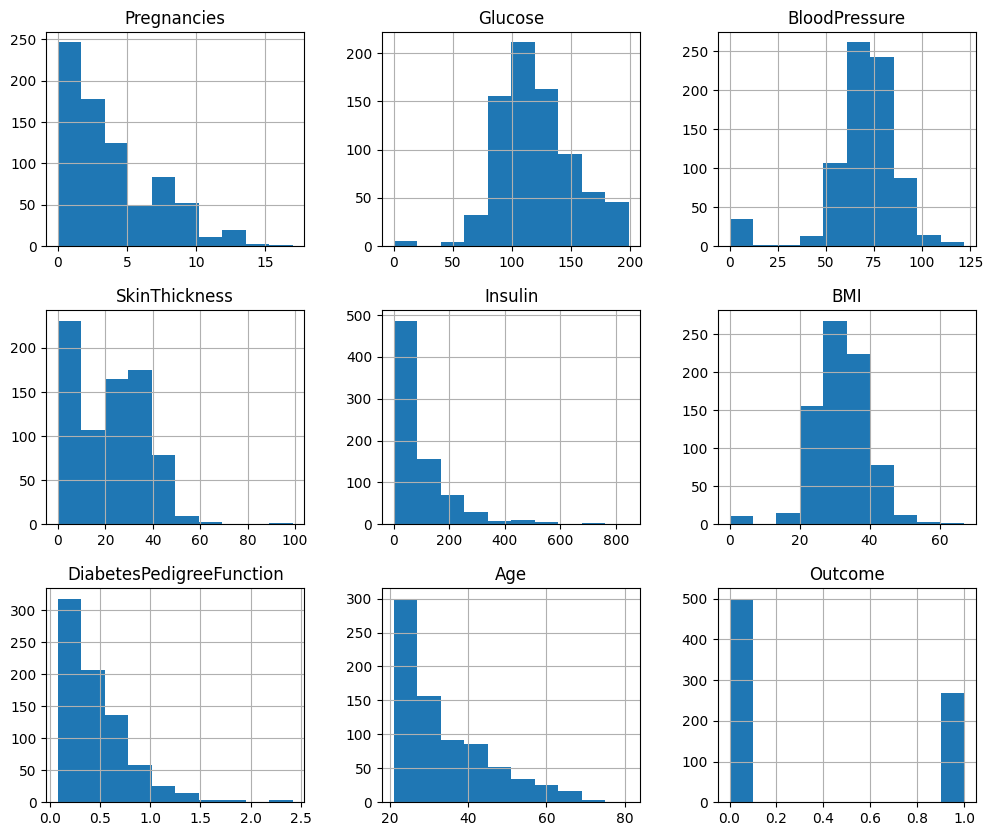

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

data.hist(figsize=(12, 10))
plt.show()

# Correlation Analysis

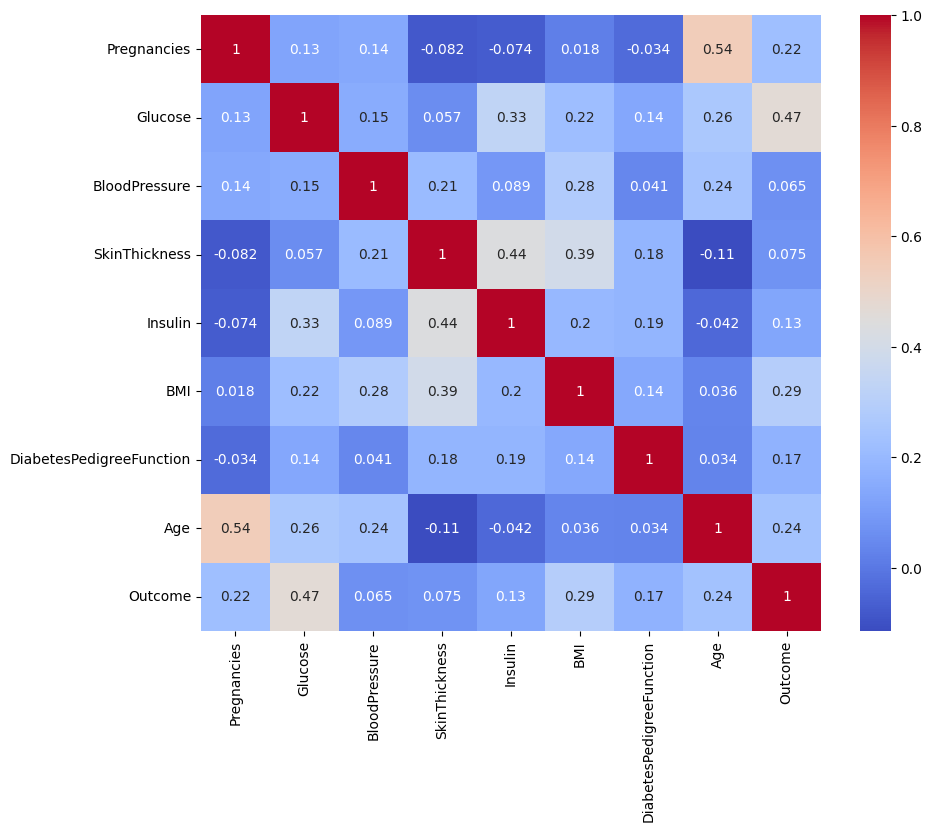

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.show()

# Data Preprocessing

In [10]:
#hanling missing and zeros
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, pd.NA)
data.fillna(data.median(), inplace=True)


In [11]:
#feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']] = scaler.fit_transform(data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']])



# train-test split

In [13]:
from sklearn.model_selection import train_test_split

# Defining features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Spliting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Modeling

In [14]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)


# Support Vector Machine (SVM)

In [15]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)


# Evaluation Metrics

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Logistic Regression Metrics
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("F1 Score:", f1_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

# SVM Metrics
print("SVM Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


Logistic Regression Metrics:
Accuracy: 0.7532467532467533
Precision: 0.6666666666666666
Recall: 0.6181818181818182
F1 Score: 0.6415094339622641
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154

SVM Metrics:
Accuracy: 0.7597402597402597
Precision: 0.6730769230769231
Recall: 0.6363636363636364
F1 Score: 0.6542056074766355
              precision    recall  f1-score   support

           0       0.80      0.83      0.82        99
           1       0.67      0.64      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154



# Visualization of Metrics with Confusion Matrix

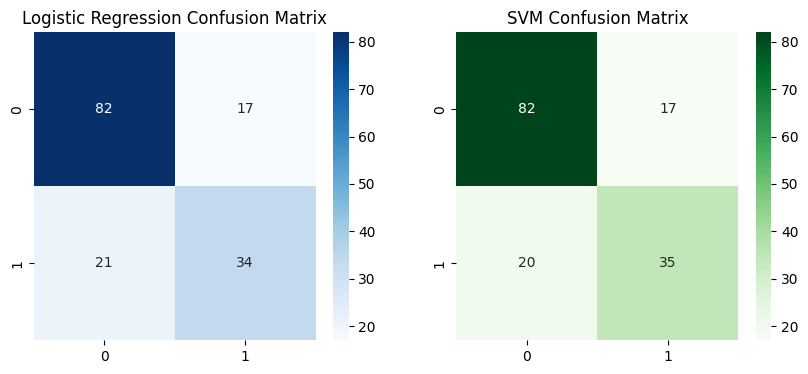

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix for Logistic Regression
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")

# Confusion Matrix for SVM
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Greens")
plt.title("SVM Confusion Matrix")

plt.show()
